In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv ('Customer Churn.csv')
df
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replacing blanks with 0 as tenure is 0 and total charges are recorded

#Converted the TotalCharges datatype to float from string 

In [12]:
df["TotalCharges"]= df["TotalCharges"].replace(" ","0")
df["TotalCharges"]= df["TotalCharges"].astype("float")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df.isnull().sum().sum()

np.int64(0)

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [20]:
df["customerID"].duplicated().sum()

np.int64(0)

#Converted 0 and 1 values of Senior Citizen to yes/no to make it easier to understand

In [44]:
print(df['SeniorCitizen'].unique())


[0 1]


In [45]:
def conv(value):
    if value==1:
     return "Yes"
    else: 
     return "No"
df['SeniorCitizen']=df["SeniorCitizen"].apply(conv)

In [69]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


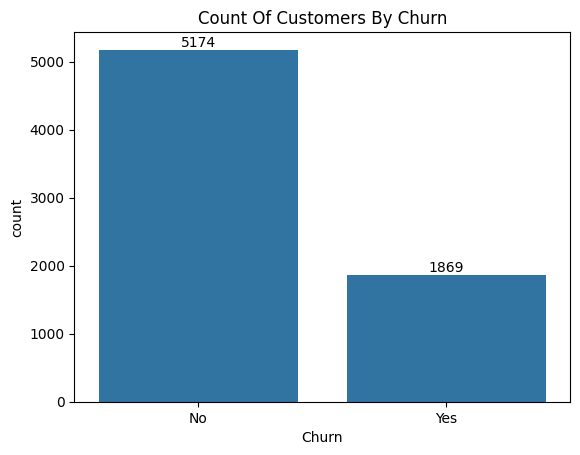

In [7]:
ax= sns.countplot(x= 'Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By Churn")
plt.show()

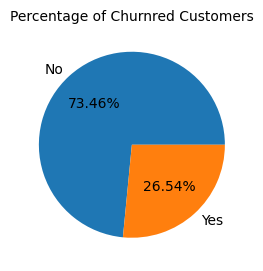

In [10]:
plt.figure(figsize=(3,4))
gb= df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churnred Customers", fontsize=10)
plt.show()

#From the given Pie Chart, we can conclude that 26.54% of our costomers have churned out
#now explore the reason behind it

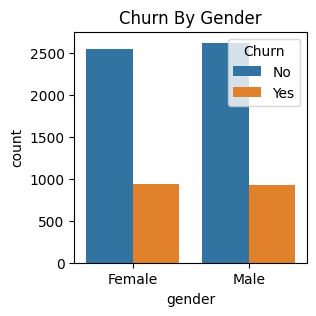

In [18]:
plt.figure(figsize=(3,3))
sns.countplot(x= "gender", data=df, hue="Churn")
plt.title("Churn By Gender")
plt.show()

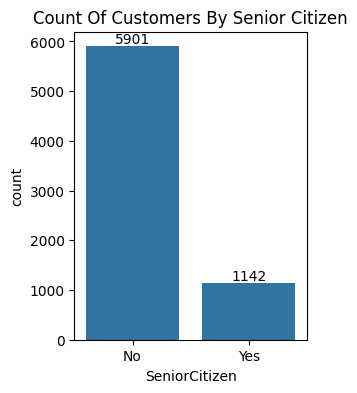

In [55]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x= "SeniorCitizen", data=df)
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By Senior Citizen")
plt.show()

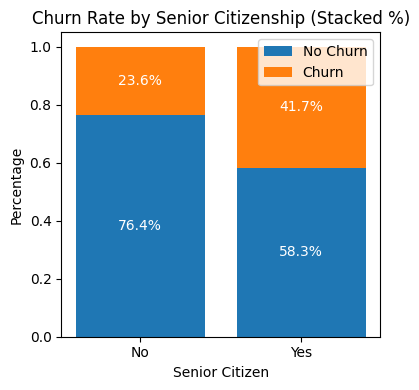

In [56]:
cross_tab = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Convert to percentages
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Step 3: Plot
labels = cross_tab_percent.index.tolist()
yes_values = cross_tab_percent["Yes"]
no_values = cross_tab_percent["No"]

# Stacked bar chart
plt.figure(figsize=(4, 4))
p1 = plt.bar(labels, no_values, label="No Churn")
p2 = plt.bar(labels, yes_values, bottom=no_values, label="Churn")

# Add percentage labels
for i in range(len(labels)):
    plt.text(i, no_values.iloc[i]/2, f"{no_values.iloc[i]*100:.1f}%", ha='center', va='center', color='white', fontsize=10)
    plt.text(i, no_values.iloc[i] + yes_values.iloc[i]/2, f"{yes_values.iloc[i]*100:.1f}%", ha='center', va='center', color='white', fontsize=10)

plt.title("Churn Rate by Senior Citizenship (Stacked %)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend()
plt.tight_layout()
plt.show()

#Comparatively a greater percentage of people in senior citizen category have churned out

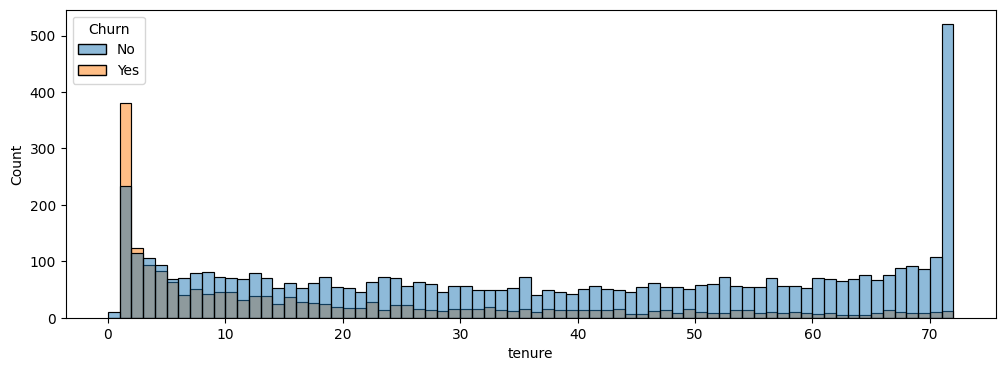

In [64]:
plt.figure(figsize=(12,4))
sns.histplot(x="tenure", data=df, bins=72, hue= "Churn")
plt.show()

#People who have used our services for a long time have stayed whereas people who have used our services for 1 or 2 months have churned out

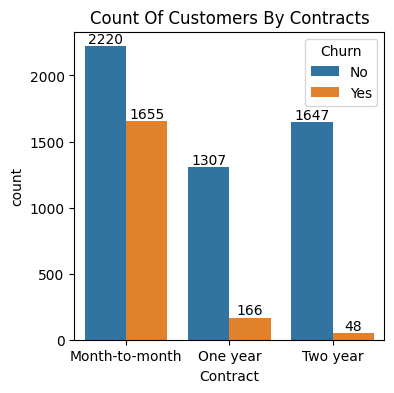

In [83]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x= "Contract", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count Of Customers By Contracts")
plt.show()

#People who are on a month to month contract are more likely to churn than the people who are on One year or Two year Contracts

In [72]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

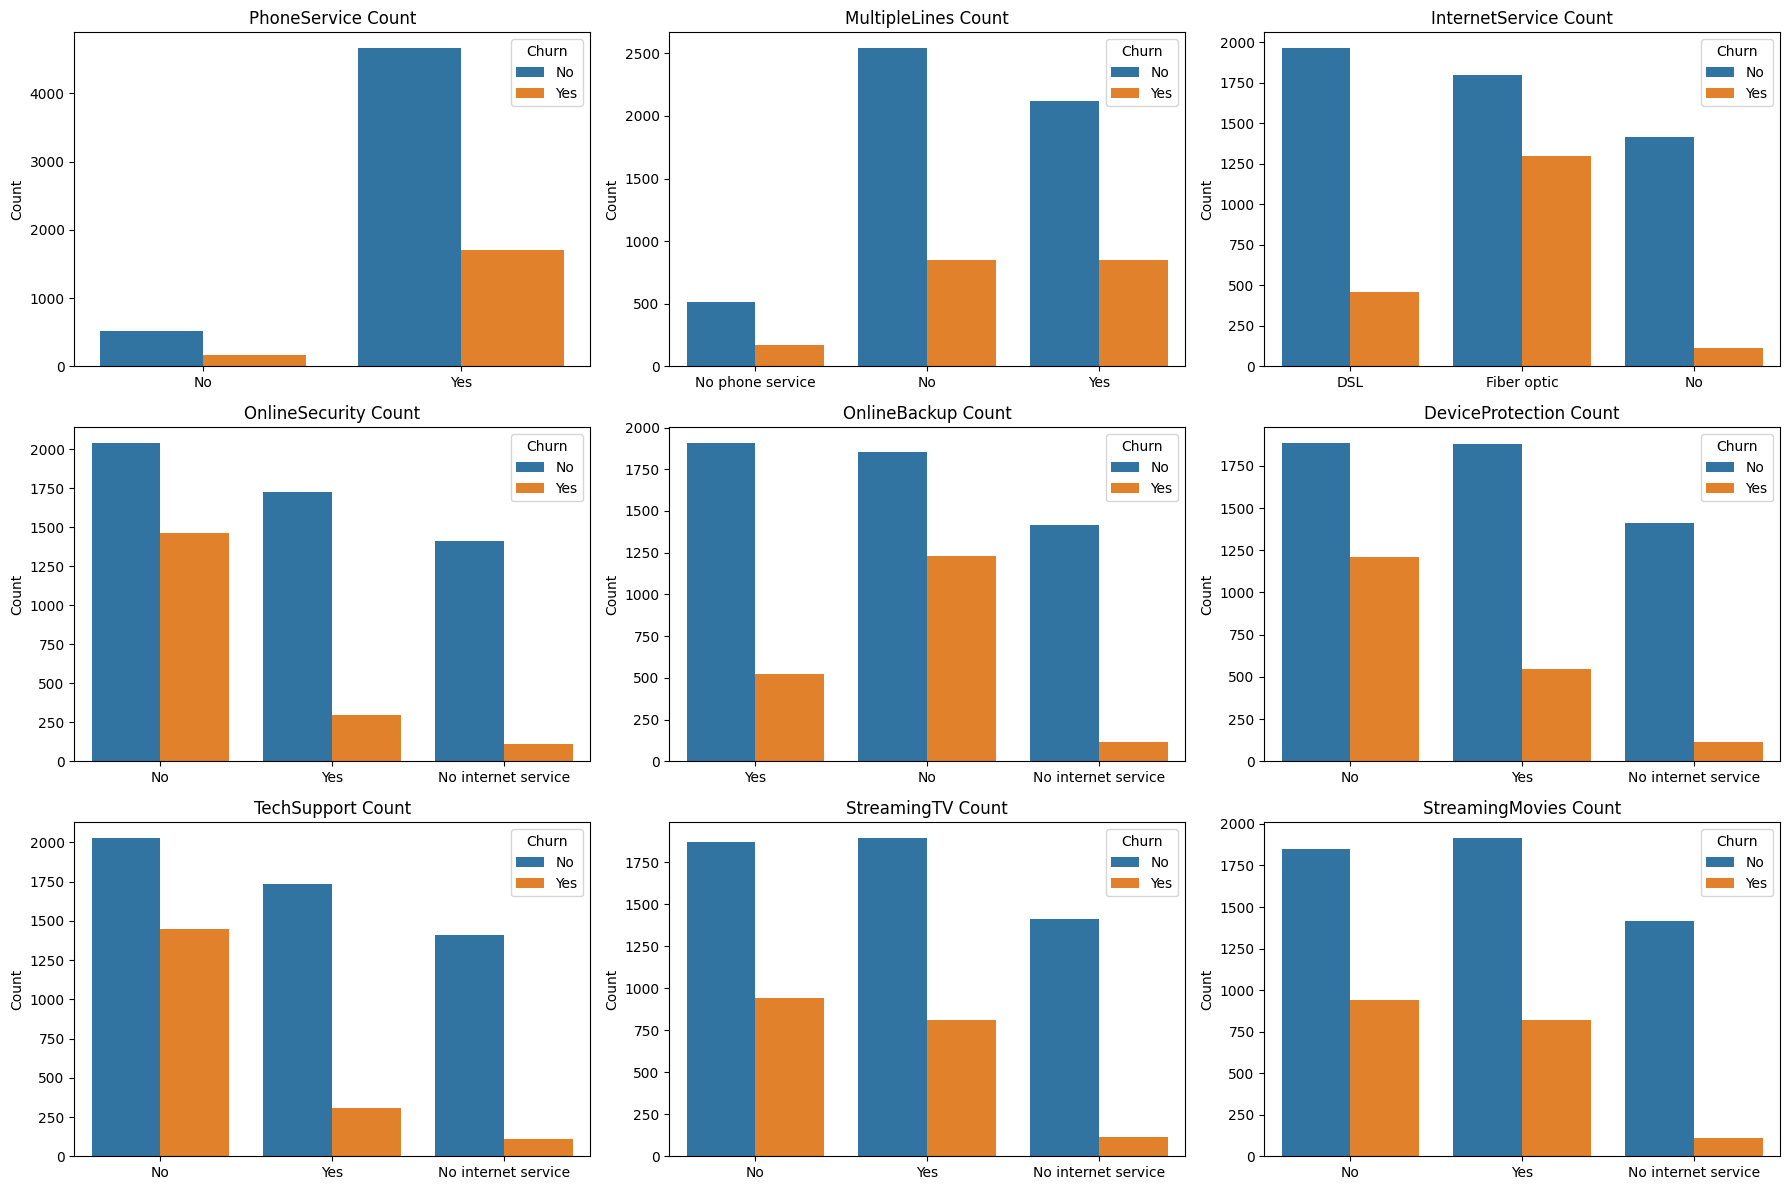

In [76]:
# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots - 3 rows, 3 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()
# Flatten the 2D array of axes to 1D

# Plot each column in a subplot
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, hue= df["Churn"], ax=axes[i])  # Removed palette
    axes[i].set_title(f'{col} Count')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=0)  # Rotate x-axis labels if needed

# Adjust layout
plt.tight_layout()
plt.show()


#Customers lacking online security, tech support, and backup services tend to churn more frequently.Fiber optic users show higher churn compared to DSL users.
#Having no additional services like streaming or device protection appears to correlate with increased churn, suggesting that service richness may influence retention.











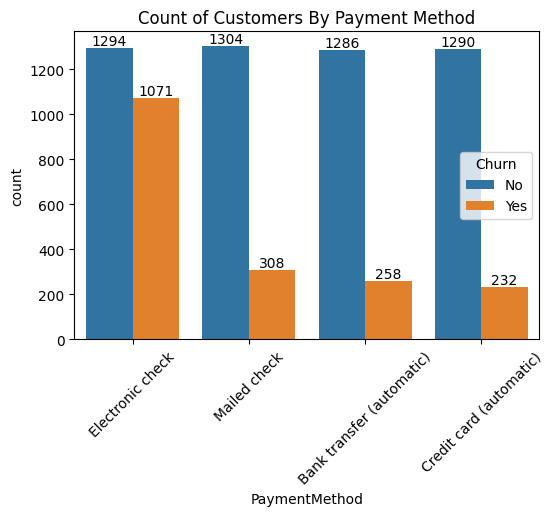

In [87]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x= "PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers By Payment Method")
plt.xticks(rotation= 45)
plt.show()

#customer is likely to churn when he is using Electronic Check as a Payment Method